In [1]:
from torchvision import transforms, models
from torch.utils.data import DataLoader

In [2]:
from src.stratified_split import StratifiedSplit
from src.car_model_dataset import CarModelDataset
from src.train_model import TrainModel

Пути для изображений

In [3]:
original_path = "auto"
train_path = "auto_train"
augmentation_path = "auto_aug"
validation_path = "auto_val"

Разделим наш оригинальный датасет на обучающий и валидационный

In [4]:
StratifiedSplit(orig_path=original_path, train_path=train_path, val_path=validation_path)

Задаем аугментации. В исходном датасете присутствует разное положение машин, немного смещенные на угол машины и разных цветов, поэтому мы можем сделать такие аугментации, не выходя за рамки исходного датасета.

In [5]:
augmentation_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomRotation(15)
])
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

Делим датасет на обучающий и валидационный с помощью нашего класса. Обучающий датасет аугментирует изображения и добавляет к обучающей выборке.

In [6]:
train_dataset = CarModelDataset(root_dir=train_path, aug_dir=augmentation_path, aug_transform=augmentation_transform, transform=transform)
val_dataset = CarModelDataset(root_dir=validation_path, transform=transform)

Преобразуем датасеты в даталоадеры по батчам.

In [7]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

Воспользуемся ResNet18 и посмотрим ее качество

e:\Projects\car_model_prediction\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
e:\Projects\car_model_prediction\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Using device: cuda:0
Epoch 1/10:
Train Loss: 1.1910, Train Acc: 0.3351
Val Loss: 1.0366, Val Acc: 0.3784
Epoch 2/10:
Train Loss: 0.9229, Train Acc: 0.6181
Val Loss: 0.8845, Val Acc: 0.7838
Epoch 3/10:
Train Loss: 0.8006, Train Acc: 0.7569
Val Loss: 0.7509, Val Acc: 0.8378
Epoch 4/10:
Train Loss: 0.6807, Train Acc: 0.8160
Val Loss: 0.6558, Val Acc: 0.8919
Epoch 5/10:
Train Loss: 0.6070, Train Acc: 0.8837
Val Loss: 0.5768, Val Acc: 0.9189
Epoch 6/10:
Train Loss: 0.5262, Train Acc: 0.9010
Val Loss: 0.5139, Val Acc: 0.9459
Epoch 7/10:
Train Loss: 0.4644, Train Acc: 0.9306
Val Loss: 0.4654, Val Acc: 0.9459
Epoch 8/10:
Train Loss: 0.4173, Train Acc: 0.9427
Val Loss: 0.4264, Val Acc: 0.9189
Epoch 9/10:
Train Loss: 0.3835, Train Acc: 0.9601
Val Loss: 0.3888, Val Acc: 0.9459
Epoch 10/10:
Train Loss: 0.3454, Train Acc: 0.9618
Val Loss: 0.3687, Val Acc: 0.9459


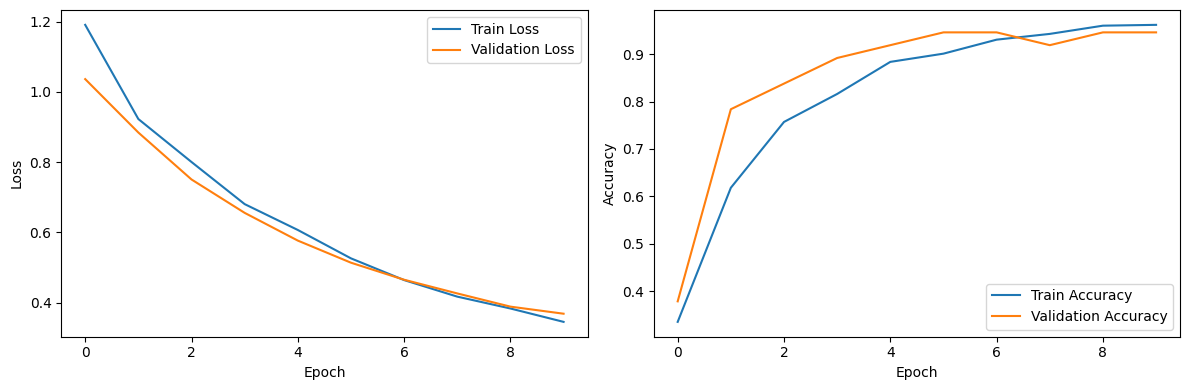

Model saved as 'car_model_classifier_resnet18.pth'


In [8]:
resnet18 = models.resnet18(pretrained=True)
model_1 = TrainModel(resnet18, verbose=True)
model_1.train(train_loader=train_loader, val_loader=val_loader)
model_1.show_plot()
model_1.model_save(model_name="car_model_classifier_resnet18.pth")

Воспользуемся ResNet50 и посмотрим его качество.

e:\Projects\car_model_prediction\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Using device: cuda:0
Epoch 1/10:
Train Loss: 1.0106, Train Acc: 0.4792
Val Loss: 0.8435, Val Acc: 0.7297
Epoch 2/10:
Train Loss: 0.7746, Train Acc: 0.7969
Val Loss: 0.6952, Val Acc: 0.7297
Epoch 3/10:
Train Loss: 0.6263, Train Acc: 0.8663
Val Loss: 0.5861, Val Acc: 0.8378
Epoch 4/10:
Train Loss: 0.5226, Train Acc: 0.9028
Val Loss: 0.5092, Val Acc: 0.8378
Epoch 5/10:
Train Loss: 0.4534, Train Acc: 0.9288
Val Loss: 0.4673, Val Acc: 0.8378
Epoch 6/10:
Train Loss: 0.4111, Train Acc: 0.9253
Val Loss: 0.4180, Val Acc: 0.8919
Epoch 7/10:
Train Loss: 0.3746, Train Acc: 0.9253
Val Loss: 0.3858, Val Acc: 0.9189
Epoch 8/10:
Train Loss: 0.3279, Train Acc: 0.9497
Val Loss: 0.3594, Val Acc: 0.9189
Epoch 9/10:
Train Loss: 0.2871, Train Acc: 0.9635
Val Loss: 0.3365, Val Acc: 0.8919
Epoch 10/10:
Train Loss: 0.2853, Train Acc: 0.9722
Val Loss: 0.3216, Val Acc: 0.9459


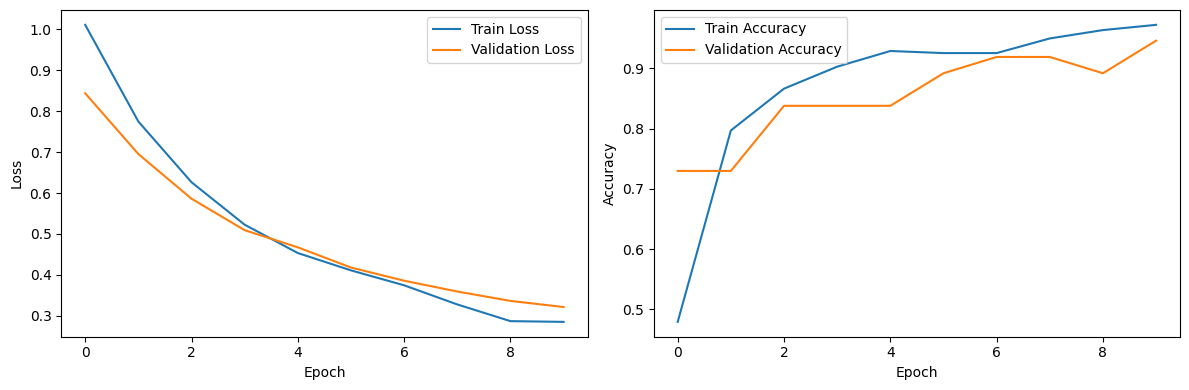

Model saved as 'car_model_classifier_resnet50.pth'


In [9]:
resnet50 = models.resnet50(pretrained=True)
model_2 = TrainModel(resnet50, verbose=True)
model_2.train(train_loader=train_loader, val_loader=val_loader)
model_2.show_plot()
model_2.model_save(model_name="car_model_classifier_resnet50.pth")